In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-segmentation/bank_transactions.csv


In [2]:
df=pd.read_csv("/kaggle/input/bank-customer-segmentation/bank_transactions.csv")
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import scipy.cluster.hierarchy as shc
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

In [7]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [8]:
try:
    from kneed import KneeLocator
except:
    
    !pip install kneed
    from kneed import KneeLocator
    
try: 
    from yellowbrick.cluster import KEIbowVisualizer
except:
    !pip install -U yellowbrick  from yellowbrick.cluster import KEIbowVisualizer
       

ERROR: Could not find a version that satisfies the requirement from (from versions: none)
ERROR: No matching distribution found for from


In [9]:
try:
    import plotly.express as px
    import plotly.graph_objects as go
except:
    !pip install plotly
    import plotly.express as px
    import plotly.graph_objects as go

In [10]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [11]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col]. nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtype','unique','sum_null']
        
    return df_check
check(df)

,column,dtype,unique,sum_null
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount (INR),float64,93024,0


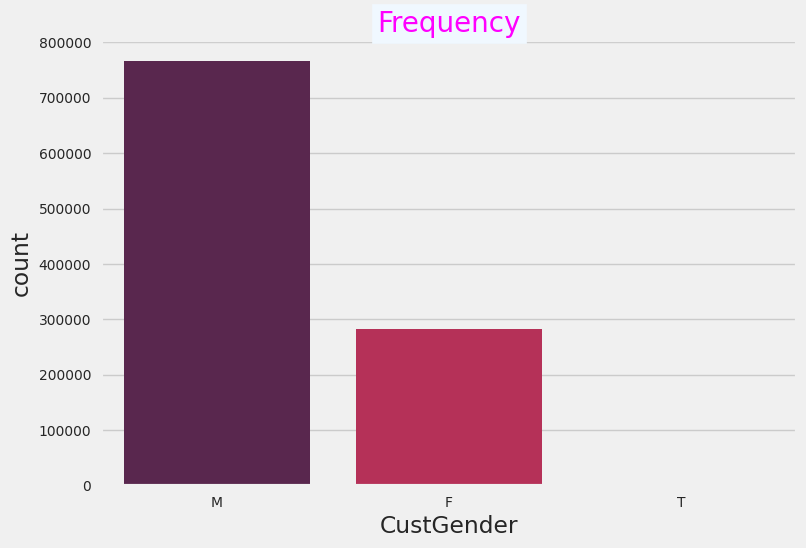

In [12]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='CustGender',data=df,palette='rocket',order=df['CustGender'].value_counts().index)
plt.title("Frequency",fontsize='20',backgroundcolor='AliceBlue',color='magenta');

In [13]:
df.dropna(subset=['CustLocation','CustomerDOB','CustAccountBalance'],inplace=True)
df.shape

(1042651, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042651 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1042651 non-null  object 
 1   CustomerID               1042651 non-null  object 
 2   CustomerDOB              1042651 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1042651 non-null  object 
 5   CustAccountBalance       1042651 non-null  float64
 6   TransactionDate          1042651 non-null  object 
 7   TransactionTime          1042651 non-null  int64  
 8   TransactionAmount (INR)  1042651 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [15]:
df.fillna({'CustGender':'M'},inplace=True)

In [16]:
df['CustomerDOB']=pd.to_datetime(df['CustomerDOB'])
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['CustomerAge']=df['TransactionDate'].dt.year-df['CustomerDOB'].dt.year


In [17]:
df['TransactionDate1']=df['TransactionDate']
df['TransactionDate2']=df['TransactionDate']

In [18]:
RMF_data=df.groupby('CustomerID').agg({
    "TransactionID":"count",
    "CustGender":"first",
    "CustLocation":"first",
    "CustAccountBalance":"mean",
    "TransactionAmount (INR)":"mean",
    "CustomerAge":"max",
    "TransactionDate2":"max",
    "TransactionDate1":"min",
    "TransactionDate":"median"
})
RMF_data=RMF_data.reset_index()
RMF_data.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,2016-08-18,2016-08-18


In [19]:
RMF_data.drop(columns=["CustomerID"],inplace=True)
RMF_data.head()

,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17
1,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14
2,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08
3,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15
4,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,2016-08-18,2016-08-18


In [20]:
RMF_data['Recency']=RMF_data['TransactionDate2']-RMF_data['TransactionDate1']

In [21]:
RMF_data['Recency']=RMF_data['Recency'].astype(str)
RMF_data.head()

,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17,18 days
1,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14,0 days
2,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08,182 days
3,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15,0 days
4,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,2016-08-18,2016-08-18,0 days


In [22]:
import re

In [23]:
RMF_data['Recency']=RMF_data['Recency'].apply(lambda x : re.search('\d+',x).group())
RMF_data['Recency']=RMF_data['Recency'].astype(int)

In [24]:
def rep_0(i):
    if i==0:
        return 1
    else:
        return 1
    RMF_data['Recency']=RMF_data['Recency'].apply(rep_0)

In [25]:
RMF_data.drop(columns=["TransactionDate1","TransactionDate2"],inplace=True)
RMF_data.head()

,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,33,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,0
2,2,F,MUMBAI,100112.950,727.5,32,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,0
4,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,0


In [26]:
RMF_data.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [27]:
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge', 'Recency']

for i in cols:
    Q1 = RMF_data[i].quantile(0.25)
    Q3 = RMF_data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num=RMF_data[(RMF_data[i] < lower) | (RMF_data[i] > upper)].shape[0]
    perc = (num / RMF_data.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))
dic={'Lower': lower_list, 'Upper':upper_list, 'Outliers':num_list,'Percentage%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge', 'Recency'])
outliers_df

,Lower,Upper,Outliers,Percentage%
Frequency,1.0000,1.0000,142200,16.16
CustAccountBalance,-78311.0400,145397.4400,116609,13.25
TransactionAmount (INR),-1385.4825,2817.1375,91878,10.44
CustomerAge,11.5000,47.5000,117231,13.32
Recency,0.0000,0.0000,139717,15.87


In [28]:
RMF_data.describe()

,Frequency,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
count,880115.000000,8.801150e+05,8.801150e+05,880115.000000,880115,880115.000000
mean,1.184676,1.146274e+05,1.567101e+03,36.169507,2016-07-26 00:34:18.358282240,15.045150
min,1.000000,0.000000e+00,0.000000e+00,-56.000000,2016-01-08 00:00:00,0.000000
25%,1.000000,5.579640e+03,1.905000e+02,25.000000,2016-06-09 00:00:00,0.000000
50%,1.000000,1.864142e+04,5.000000e+02,29.000000,2016-08-19 00:00:00,0.000000
75%,1.000000,6.150676e+04,1.241155e+03,34.000000,2016-09-09 00:00:00,0.000000
max,6.000000,1.150355e+08,1.560035e+06,216.000000,2016-12-09 00:00:00,336.000000
std,0.449134,8.007375e+05,6.432428e+03,51.255475,NaN,46.936939


In [29]:
RMF_data.columns

Index(['Frequency', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionAmount (INR)', 'CustomerAge', 'TransactionDate', 'Recency'],
      dtype='object')

In [30]:
RMF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880115 entries, 0 to 880114
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Frequency                880115 non-null  int64         
 1   CustGender               880115 non-null  object        
 2   CustLocation             880115 non-null  object        
 3   CustAccountBalance       880115 non-null  float64       
 4   TransactionAmount (INR)  880115 non-null  float64       
 5   CustomerAge              880115 non-null  int32         
 6   TransactionDate          880115 non-null  datetime64[ns]
 7   Recency                  880115 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 50.4+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder

lr=LabelEncoder()

RMF_data['CustGender']=lr.fit_transform(RMF_data['CustGender'])

In [32]:
from sklearn.preprocessing import LabelEncoder

lr=LabelEncoder()

RMF_data['CustLocation']=lr.fit_transform(RMF_data['CustLocation'])

<Axes: >

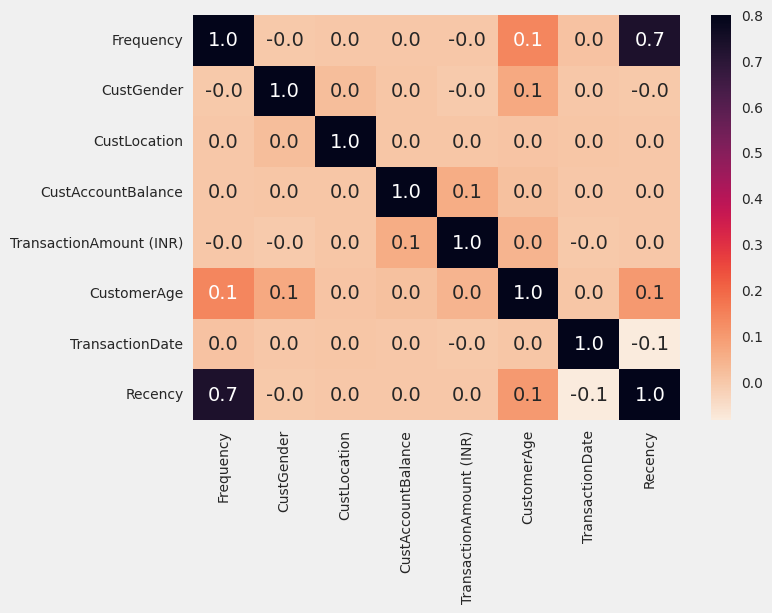

In [33]:
plt.figure(figsize=(7,5))
correlation=RMF_data.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,        
    fmt='.1f',
    linecolor='white',
    cbar=True)

In [34]:
RMF_data.reset_index(drop=True, inplace=True)
RMF_data.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,2,0,5632,76340.635,2553.0,33,2016-09-17,18
1,1,1,5040,24204.490,1499.0,22,2016-08-14,0
2,2,0,5040,100112.950,727.5,32,2016-04-08,182
3,1,0,1452,496.180,30.0,26,2016-09-15,0
4,1,1,4087,87058.650,5000.0,-49,2016-08-18,0


In [35]:
minmax = MinMaxScaler()
standard_scaler = StandardScaler()
RMF_scaled = RMF_data.copy()
RMF_scaled[["Frequency", "CustGender", "Recency", "CustLocation"]]=minmax.fit_transform(RMF_data[["Frequency", "CustGender", "Recency", "CustLocation"]])
RMF_scaled[["CustAccountBalance", "TransactionAmount (INR)", "CustomerAge"]] = standard_scaler.fit_transform(RMF_data[["CustAccountBalance", "TransactionAmount (INR)", "CustomerAge"]])

In [36]:
RMF_scaled.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,0.2,0.0,0.629414,-0.047814,0.153270,-0.061837,2016-09-17,0.053571
1,0.0,0.5,0.563254,-0.112925,-0.010587,-0.276449,2016-08-14,0.000000
2,0.2,0.0,0.563254,-0.018126,-0.130526,-0.081348,2016-04-08,0.541667
3,0.0,0.0,0.162271,-0.142533,-0.238961,-0.198408,2016-09-15,0.000000
4,0.0,0.5,0.456750,-0.034429,0.533687,-1.661667,2016-08-18,0.000000


In [37]:
RMF_scaled.drop(columns=["TransactionDate"],inplace=True)

In [38]:
RMF_scaled.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,0.2,0.0,0.629414,-0.047814,0.153270,-0.061837,0.053571
1,0.0,0.5,0.563254,-0.112925,-0.010587,-0.276449,0.000000
2,0.2,0.0,0.563254,-0.018126,-0.130526,-0.081348,0.541667
3,0.0,0.0,0.162271,-0.142533,-0.238961,-0.198408,0.000000
4,0.0,0.5,0.456750,-0.034429,0.533687,-1.661667,0.000000


In [39]:
RMF_scaled=RMF_scaled.sample(n=7500,random_state=69).reset_index(drop=True)
RMF_scaled.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,Recency
0,0.0,0.5,0.329459,-0.115036,-0.184550,-0.198408,0.000000
1,0.0,0.5,0.629414,-0.141870,-0.228390,-0.042327,0.000000
2,0.4,0.5,0.830577,-0.117108,-0.194914,-0.159388,0.672619
3,0.0,0.0,0.171323,-0.121612,-0.212533,-0.315469,0.000000
4,0.0,0.0,0.234242,-0.132974,-0.181440,-0.256939,0.000000


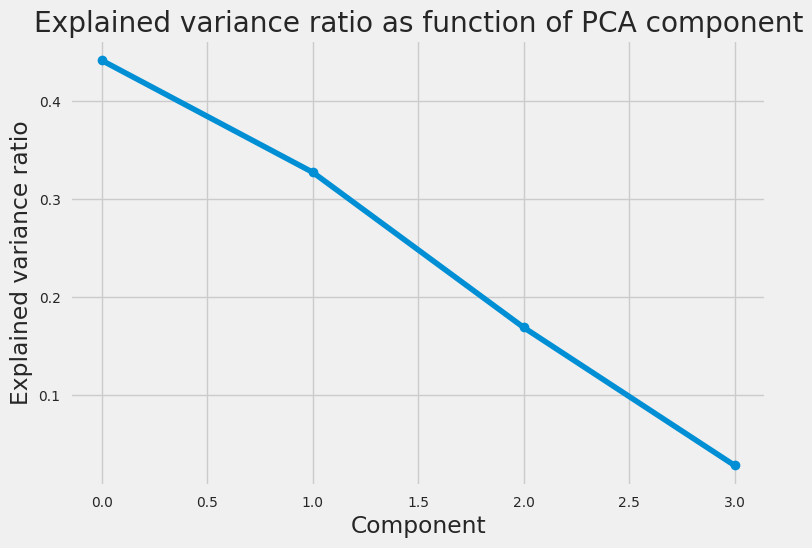

In [40]:
trial_pca=PCA(n_components=4)
trial_pca.fit(RMF_scaled)
test=trial_pca.transform(RMF_scaled)
plt.plot(list(trial_pca.explained_variance_ratio_), '-o')
plt.title('Explained variance ratio as function of PCA component')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

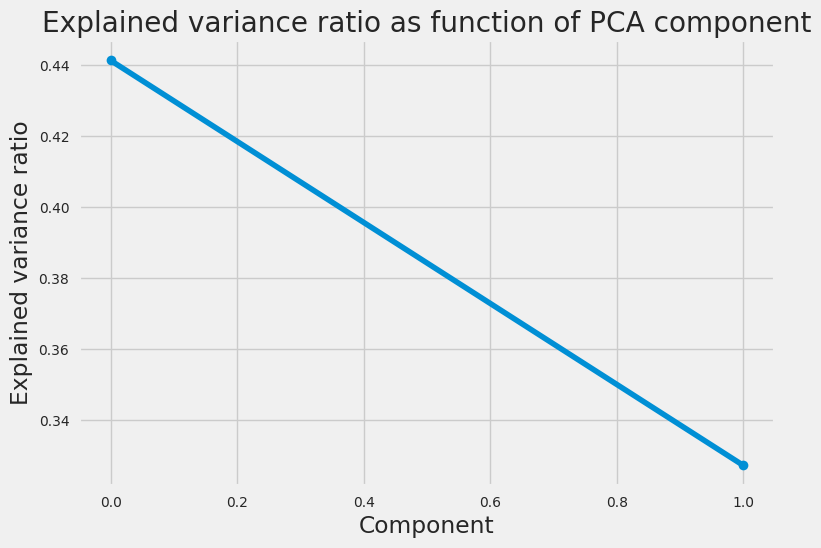

In [41]:
trial_pca=PCA(n_components=2)
trial_pca.fit(RMF_scaled)
test=trial_pca.transform(RMF_scaled)
plt.plot(list(trial_pca.explained_variance_ratio_), '-o')
plt.title('Explained variance ratio as function of PCA component')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

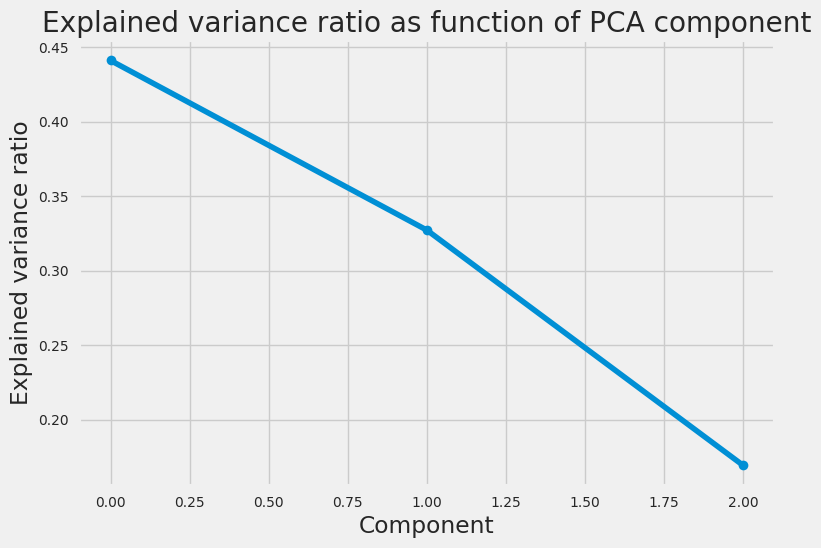

In [42]:
trial_pca=PCA(n_components=3)
trial_pca.fit(RMF_scaled)
test=trial_pca.transform(RMF_scaled)
plt.plot(list(trial_pca.explained_variance_ratio_), '-o')
plt.title('Explained variance ratio as function of PCA component')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [43]:
RMF_pca=PCA(n_components=3)
reduced_features=RMF_pca.fit_transform(RMF_scaled)
X_principal=pd.DataFrame(reduced_features)
X_principal.columns=['P1','P2','P3']

In [44]:
WCSS = []
silh_scores_kmeans = []
db_scores_kmeans = []
for n_cluster in range(2, 11):

    model_kmeans = KMeans(n_clusters=n_cluster, n_init=10)
    model_kmeans.fit(reduced_features)
    WCSS.append(model_kmeans.inertia_)
    silh_scores_kmeans.append( silhouette_score (reduced_features, model_kmeans.labels_))

    db_scores_kmeans.append( davies_bouldin_score (reduced_features, model_kmeans.labels_))

In [45]:
silh_scores_kmeans

[0.8460786509416867,
 0.8467251573096413,
 0.8524933016827624,
 0.7652189627840671,
 0.7780271768427165,
 0.7801099997831974,
 0.7882039503080371,
 0.7918674714629905,
 0.6919293101405656]

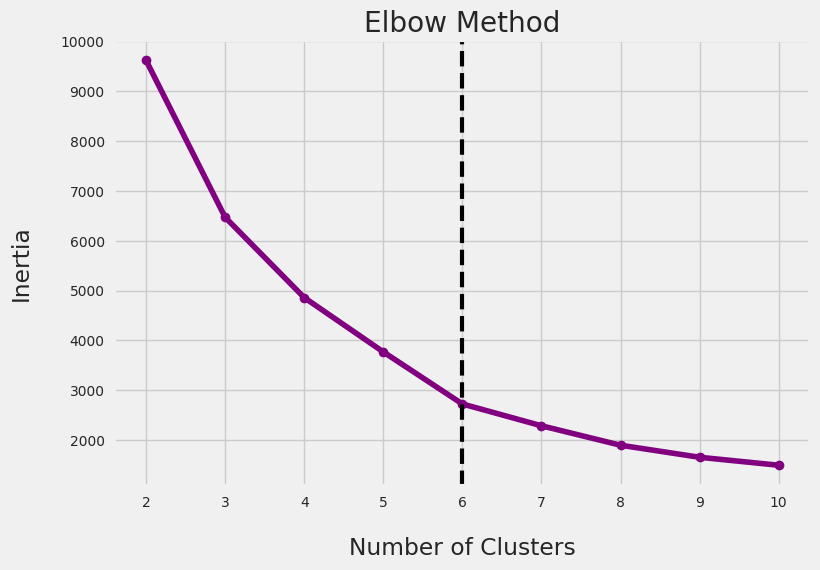

In [46]:
plt.style.use("fivethirtyeight") #fig, ax-plt.subplots(1,2, figsize=(20,5))

kl= KneeLocator(range(2,11), WCSS, curve='convex', direction="decreasing")
plt.plot(range(2,11), WCSS, color='purple', marker='o', label='Elbow Method')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters", labelpad=20)
plt.ylabel("Inertia", labelpad=20)
plt.title("Elbow Method")
plt.axvline(x=kl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)